 # Unsupervised Learning Clustering Checkpoint


#### What You're Aiming For

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

#### Dataset description:
This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

* CUST_ID: Identification of Credit Card holder (Categorical)

* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

* PURCHASES: Amount of purchases made from account 

* CASH_ADVANCE: Cash in advance given by the user

* CREDIT_LIMIT: Limit of Credit Card for user 

* PAYMENTS: Amount of Payment done by user 

## Instructions

Import you data and perform basic data exploration phase

Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )

Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

Perform partitional clustering using the K-means algorithm. Then, plot the clusters

Find the best k value and plot the clusters again.

Interpret the results

#### Step 1: Import Data and Perform Basic Data Exploration

In [32]:

# import the necessary libraries and load the dataset.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [19]:
# Load the dataset
url = (r"C:\Users\User\Desktop\gomycode\Machine Learning\Credit_card_dataset.csv")  

data = pd.read_csv(url)

In [21]:
# Display the first few rows of the dataset

print(data.head())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  


In [23]:
# Display basic information about the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None


In [27]:
# Check for missing values

print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [29]:
# Summary statistics

print(data.describe())

       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361.280000    856.901546   3000.000000   
75%             1.000000   1110.130000   1901.134317   6500.000000   
max             1.000000  49039.570000  50721.483360  30000.000000   

       CASH_ADVANCE  
count   8950.000000  
mean     978.871112  
std     2097.163877  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%     1113.821139  
max    47137.211760  


#### Step 2: Data Preparation

Handling Missing Values and Data Encoding

If there are any missing values, we can handle them by either filling them with a specific value or dropping the rows/columns. Since CUST_ID is categorical, we will not encode it for clustering.

In [ ]:
# Handling missing values

data.fillna(data.(), inplace=True) # Filling missing values with mean for numerical columns

In [93]:
# Check again for missing values

print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64


#### Outlier Handling

We can visualize the data to identify outliers and handle them accordingly.

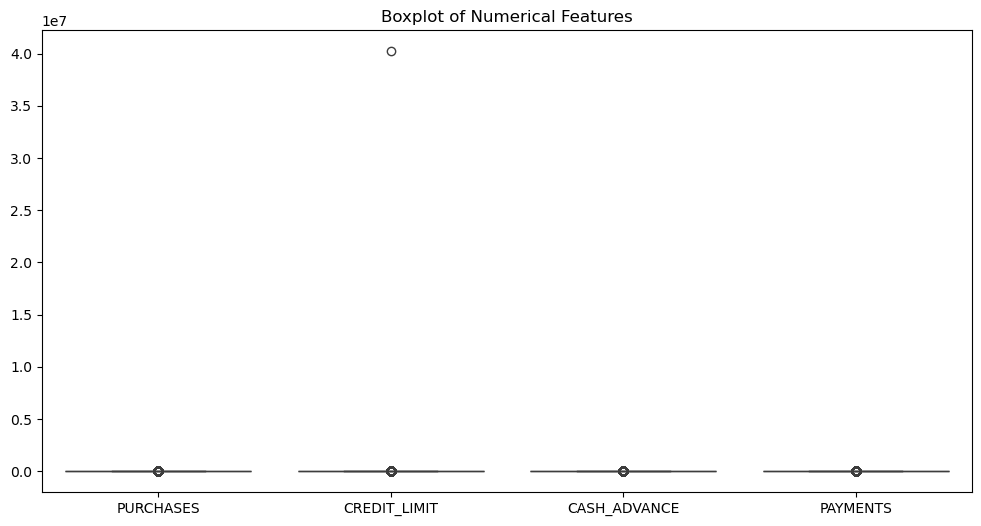

In [102]:
# Visualizing outliers using boxplots

plt.figure(figsize=(12, 6))

sns.boxplot(data=data[['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS']])

plt.title('Boxplot of Numerical Features')

plt.show()

In [104]:
# Removing outliers (for example, using IQR method)

Q1 = data[['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS']].quantile(0.25)

Q3 = data[['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS']].quantile(0.75)

IQR = Q3 - Q1

In [106]:
# Filtering out outliers

data = data[~((data[['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS']] < (Q1 - 1.5 * IQR)) | (data[['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS']] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Step 3: Hierarchical Clustering

We will perform hierarchical clustering using the PURCHASES and CREDIT_LIMIT features.

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [111]:
# Selecting features for clustering

X = data[['PURCHASES', 'CREDIT_LIMIT']]

In [113]:
# Performing hierarchical clustering

linked = linkage(X, method='ward')


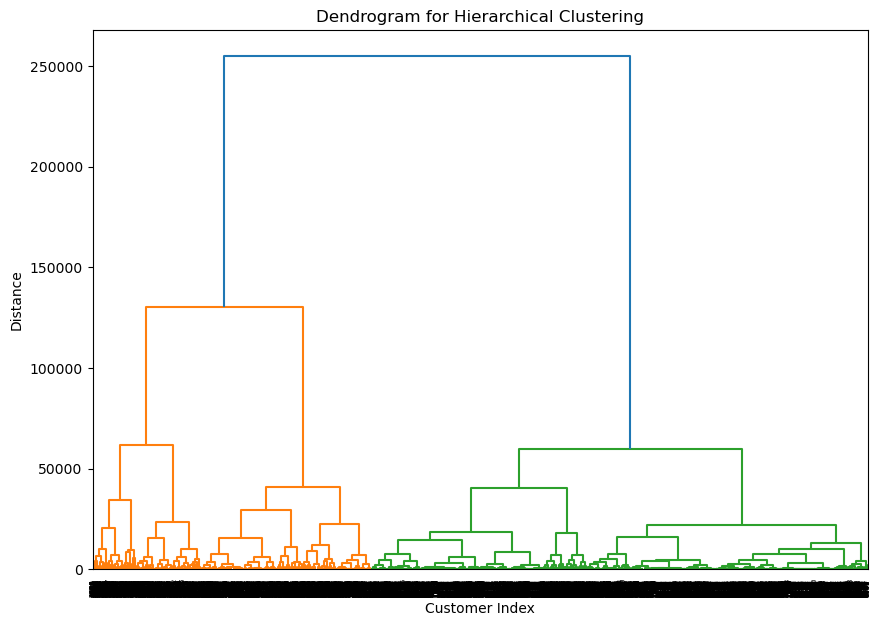

In [115]:
# Plotting the dendrogram

plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical Clustering')

plt.xlabel('Customer Index')

plt.ylabel('Distance')

plt.show()

#### Step 4: K-Means Clustering

Now, we will perform K-means clustering and plot the clusters.

In [122]:
from sklearn.cluster import KMeans

In [126]:
# Finding the optimal number of clusters using the Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

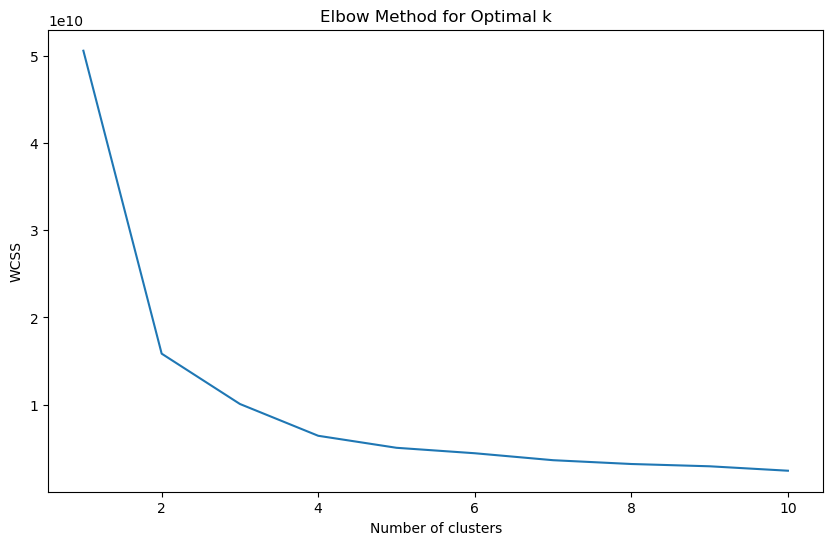

In [128]:
# Plotting the Elbow method

plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), wcss)

plt.title('Elbow Method for Optimal k')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

#### Step 5: Fit K-Means with Optimal k

After determining the optimal number of clusters (let's say it is 4), we can fit the K-means model and plot the clusters

In [133]:
# Fitting K-means with the optimal number of clusters

optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

data['Cluster'] = kmeans.fit_predict(X)

C:\Users\User\AppData\Local\Temp\ipykernel_17088\206262068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(X)


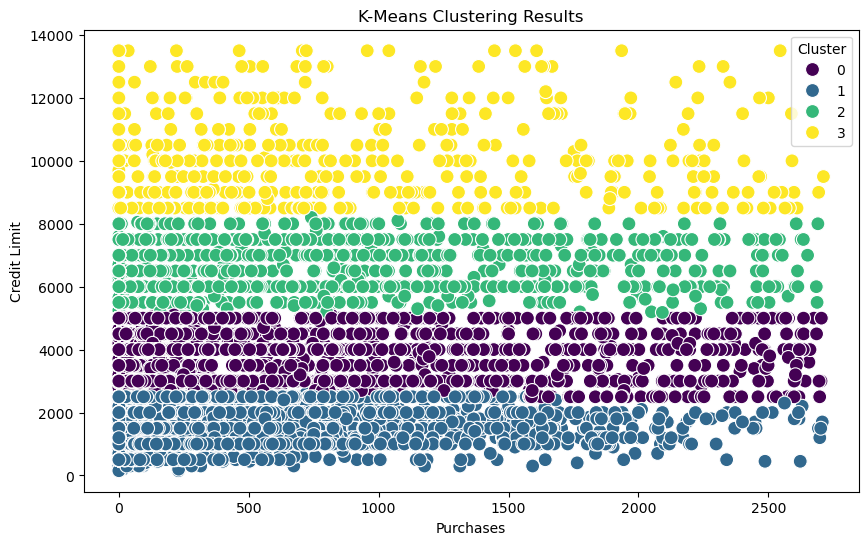

In [135]:
# Plotting the clusters

plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='viridis', s=100)

plt.title('K-Means Clustering Results')

plt.xlabel('Purchases')

plt.ylabel('Credit Limit')

plt.legend(title='Cluster')

plt.show()

#### Step 6: Interpret the Results

* Hierarchical
